# TensorFlow 2.0 *Image* Module research
[tensorflow modules api](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf) <br>
[config: optimizer, connect to cluster,...](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/config) <br>
****
```python
rgb = tf.image.hsv_to_rgb(images, name=None)
```
[tensorflow image](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/image) <br>
## Modules Reference
[tf image](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/image) <br>
[tf math](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/math) <br>
[tf initializers](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers) <br>
[audio](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/audio) <br>
[]() <br>
[]() <br>
## Concept: @tf.function decorator - save models as graphs (tink NL)
[overview (autograph](https://www.tensorflow.org/beta/guide/autograph) <br>
[tf_function ref](https://www.tensorflow.org/beta/tutorials/eager/tf_function) <br>
[generate a concrete function](https://www.tensorflow.org/lite/r2/convert/concrete_function) <br>
[]() <br>
[]() <br>
## Concept AutoGraph
[autograph guide](https://www.tensorflow.org/guide/autograph) <br>
[autograph module (exprimental)](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/autograph) <br>
[]() <br>
[]() <br>

In [1]:

%reload_ext autoreload
%autoreload 2

In [6]:
import tensorflow as tf
from tensorflow import image as tfim

import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from PIL import Image

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp



def starfish_ish_II(Z, p, Z0=None, ET=None):
    """ Z = starfish_ish(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Z = Z = Z**(-np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p)**(np.exp(Z**p)**(\
                    -np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p))))))))
    return Z

def show_parameters(par_set):
    for k, v in par_set.items():
        print('%40s: %s'%(k, '{}'.format(v)))
    pass

# help(tfim)

In [3]:
#                                        One of Two parameter sets on this page
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = -0.051448293230+0.304348945637j
list_tuple = [(starfish_ish_II, (p))]

show_parameters(par_set)

#                  Run The calculation
print('\t\tcalclulating, ... ')
t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

#                  Escape Time Graphical norm - graphically easier data
print('\t\tconverting, ... ')
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

		calclulating, ... 
70.54308319091797 	 total time
		converting, ... 
converstion time =	 1.6376471519470215


coloring time =	 4.2030229568481445


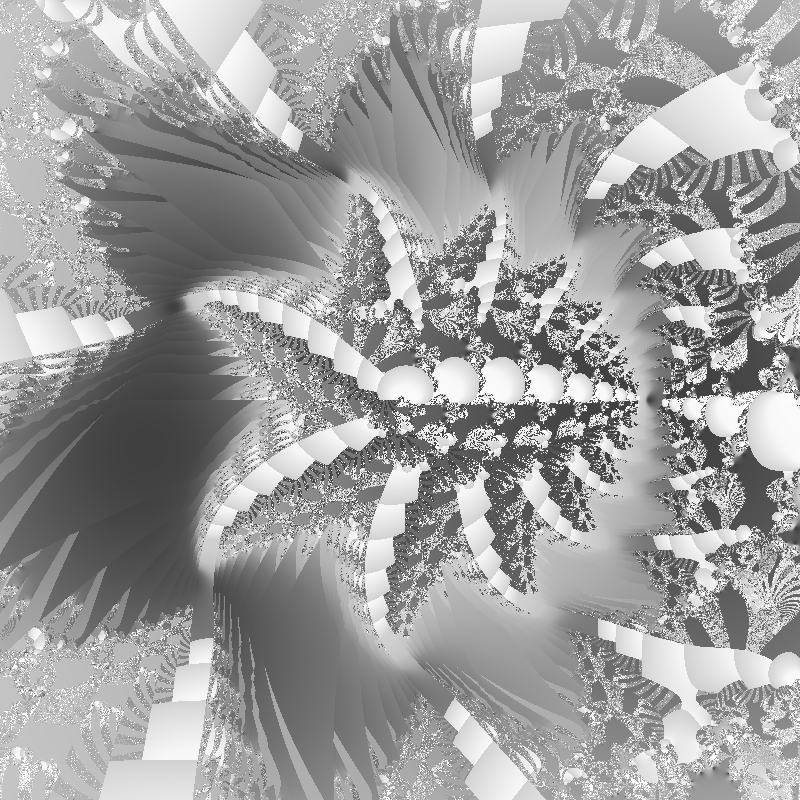

In [21]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

In [52]:
imp_arr = np.array([ETn, Zd, Zr])
d = tf.convert_to_tensor([[ETn], [Zd], [Zr]], dtype=tf.float32)
# d_im = tfim.hsv_to_rgb(d, name=None)
# display(d_im)

<class 'numpy.ndarray'> (800, 800, 3, 1)


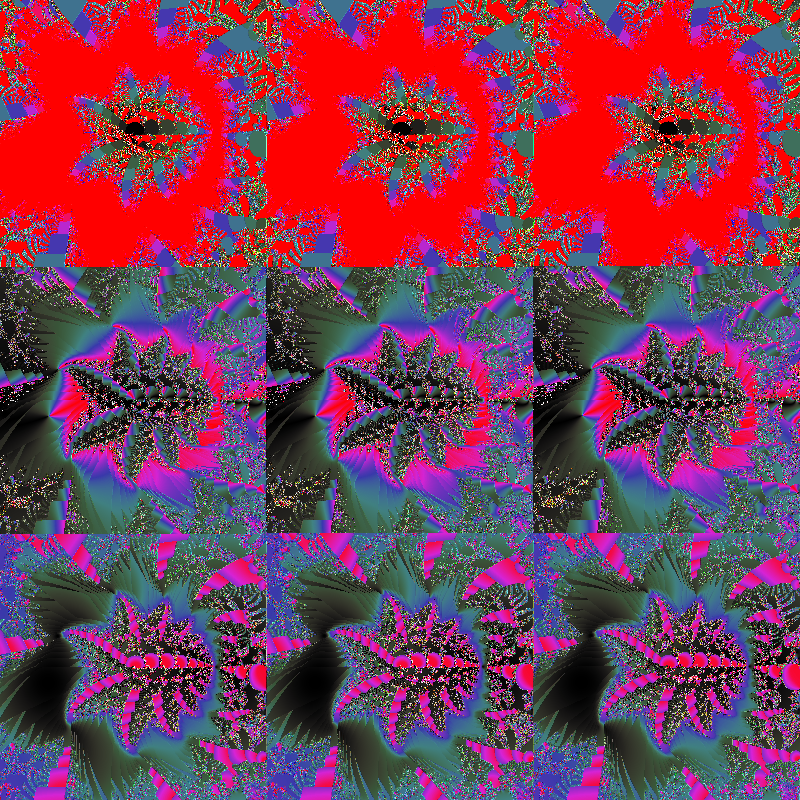

In [55]:
# npr = np.uint8(np.concatenate([Zd, Zr, ETn]) * 255)
ch3 = np.uint8(Zd * 255)
ch2 = np.uint8(Zr * 255)
ch1 = np.uint8(ETn * 255)
imp_arr = np.array([[ch1], [ch2], [ch3]]).reshape(800,800,3,1)
hsv = Image.fromarray(imp_arr, 'HSV')
rgb = hsv.convert('RGB')
print(type(imp_arr),imp_arr.shape)
display(rgb)

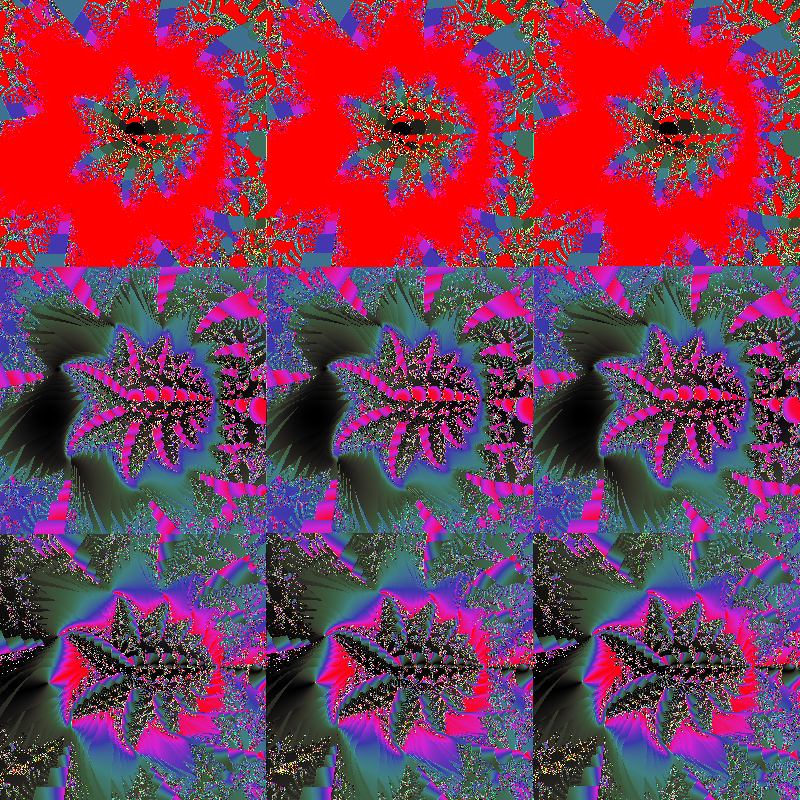

In [44]:
imp_arr = np.array([ETn, Zd, Zr]).reshape(800,800,3)
dakine = tfim.hsv_to_rgb(imp_arr, name=None)

dkine_im = Image.fromarray(np.uint8(dakine*255))
display(dkine_im)

In [16]:
%whos

Variable          Type               Data/Info
----------------------------------------------
ET                ndarray            800x800: 640000 elems, type `float64`, 5120000 bytes (4.8828125 Mb)
ETn               ndarray            800x800: 640000 elems, type `float64`, 5120000 bytes (4.8828125 Mb)
Image             module             <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
Z                 ndarray            800x800: 640000 elems, type `complex128`, 10240000 bytes (9.765625 Mb)
Z0                ndarray            800x800: 640000 elems, type `complex128`, 10240000 bytes (9.765625 Mb)
Zd                ndarray            800x800: 640000 elems, type `float64`, 5120000 bytes (4.8828125 Mb)
Zr                ndarray            800x800: 640000 elems, type `float64`, 5120000 bytes (4.8828125 Mb)
autopep8          module             <module 'autopep8' from '<...>te-packages/autopep8.py'>
display           function           <function display at 0x107bc4bf8>
gu           